# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [165]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [166]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [167]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return (np.dot(np.dot(X, w) - y, np.dot(X, w) - y) / X.shape[0])

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 * np.dot(X.transpose(), (np.dot(X, w) - y)) / X.shape[0])

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [168]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [169]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    ans = []
    size = w_init.size
    ans.append(w_init)
    prev_w = w_init
    for i in range(1, n_iterations):
      new_w = np.zeros(size)
      new_w = prev_w - lr * loss.calc_grad(X, y, prev_w)
      ans.append(new_w)
      prev_w = new_w
    return ans

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [170]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [171]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649652


In [172]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

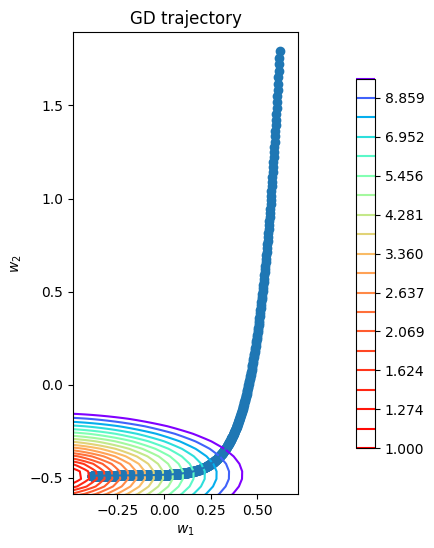

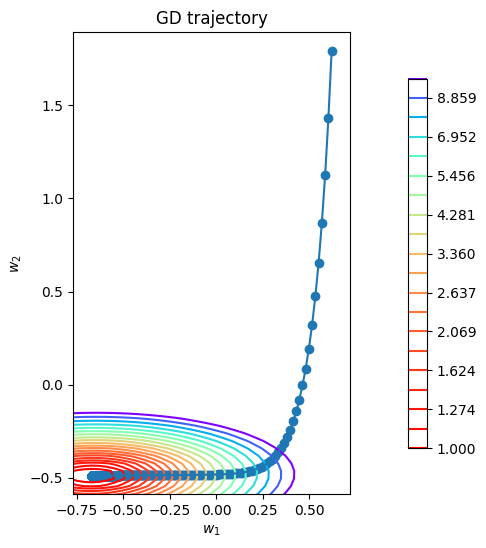

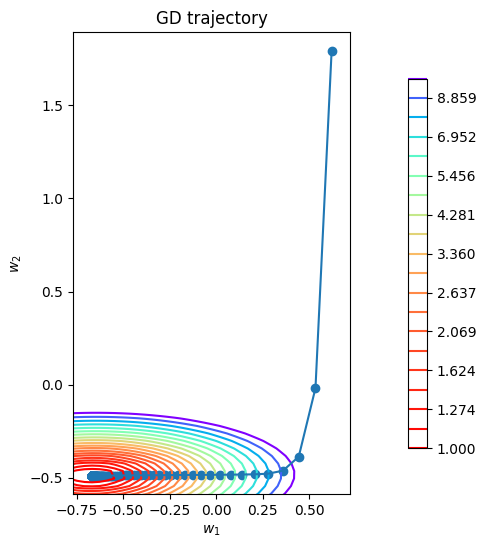

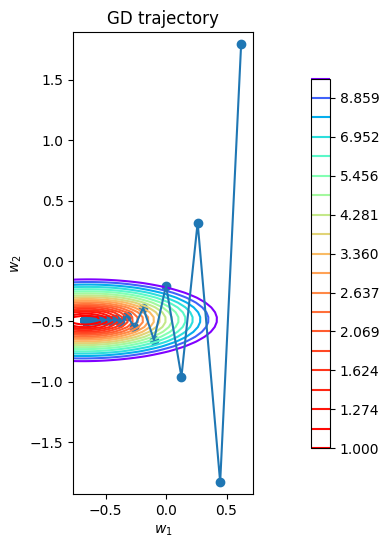

In [173]:
lr_values = [0.0001, 0.001, 0.005, 0.01]
for lr in lr_values:
  w_list = gradient_descent(w_init, X, y, loss, lr, 1000)
  plot_gd(w_list, X, y, loss)

# Если параметр lr слишком маленький, то модель сходится медленно и не успевает достичь локального минимума.
# При слишком большом значении lr модель может не сойтись, так как модель "перепрыгнет" оптимальное значение.
# Маленький lr увеличивает время работы, однако повышает и точность, в то время как большой lr снижает время работы, но страдает по значениям точности.
# Поэтому следует следить за значением lr и выбирать его оптимальным образом.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [174]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    ans = []
    size = w_init.size
    ans.append(w_init)
    prev_w = w_init
    for i in range(1, n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      y_batch = y[batch_indices]
      new_w = np.zeros(size)
      new_w = prev_w - lr * loss.calc_grad(batch, y_batch, prev_w)
      ans.append(new_w)
      prev_w = new_w
    return ans

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

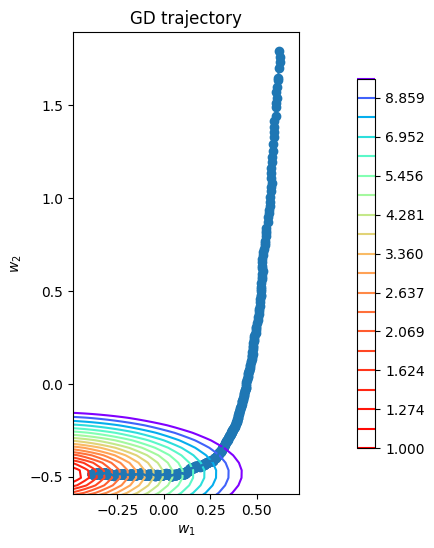

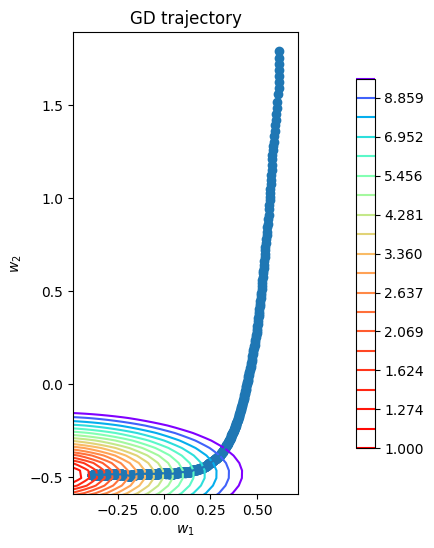

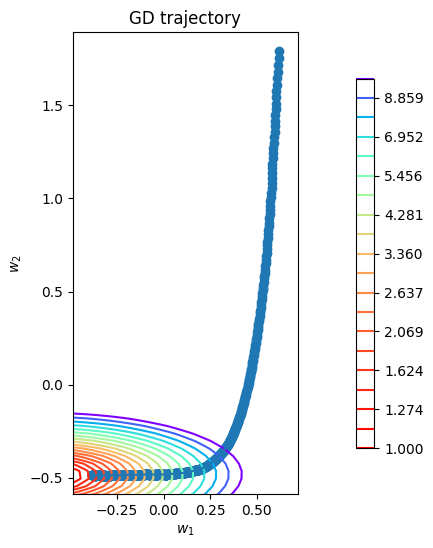

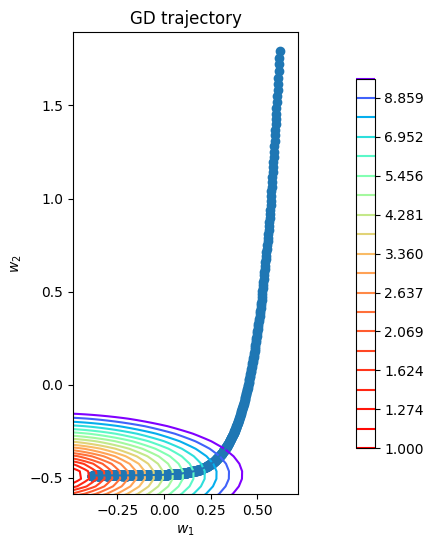

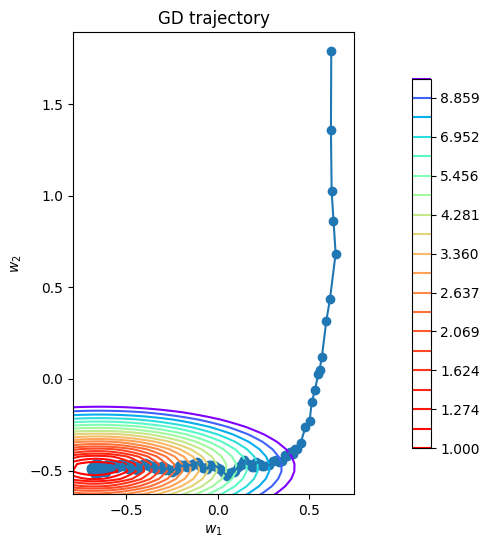

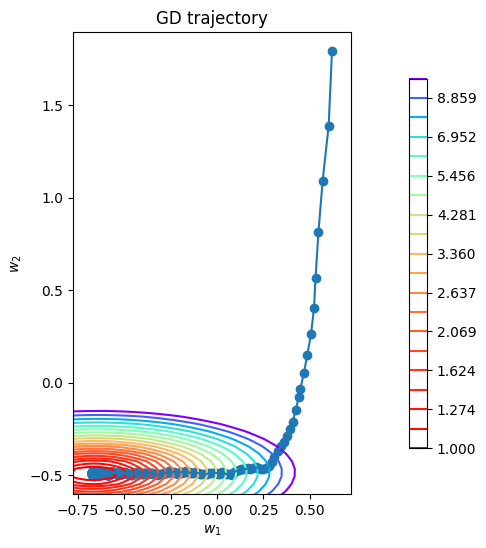

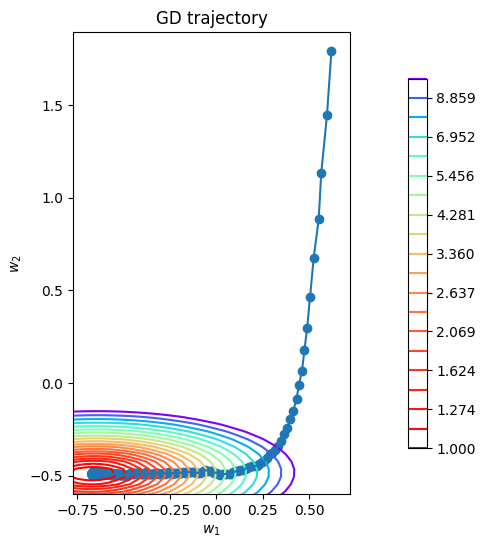

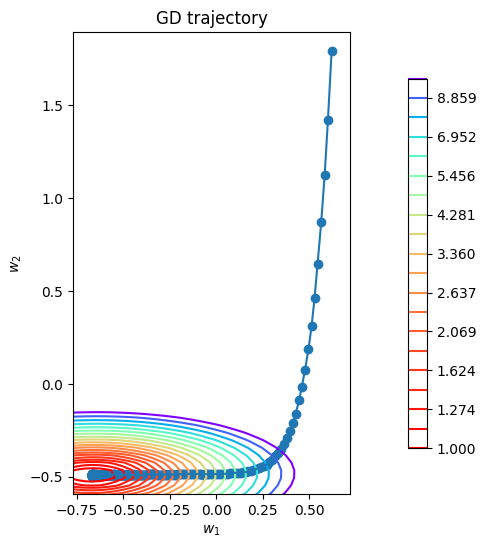

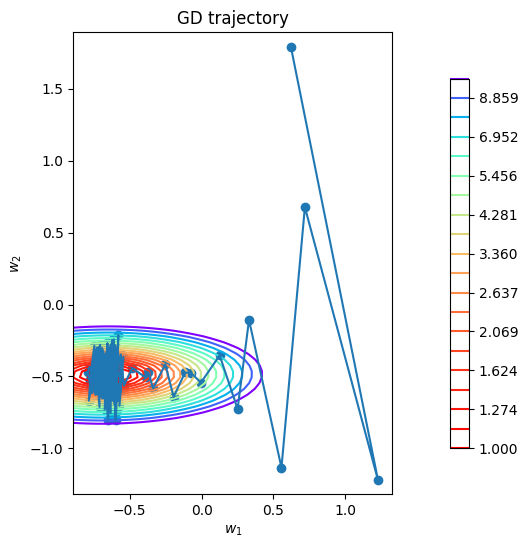

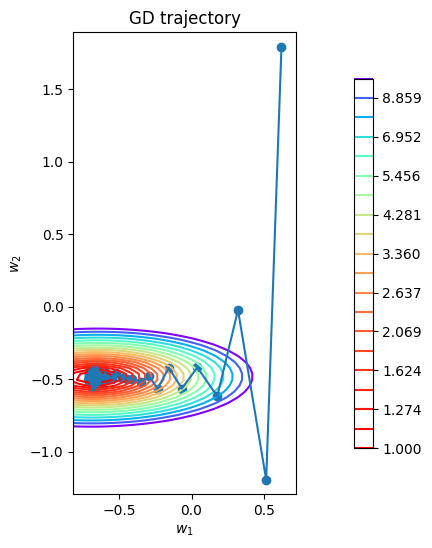

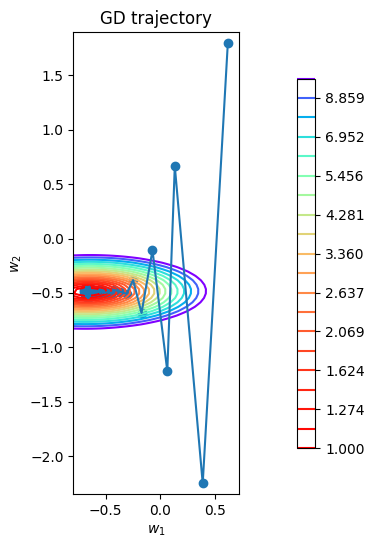

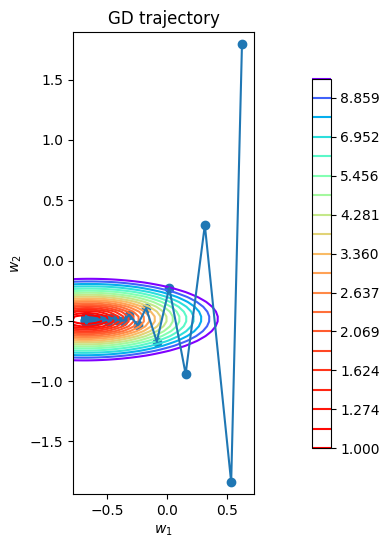

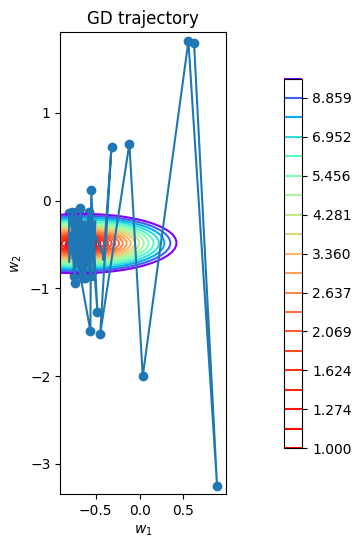

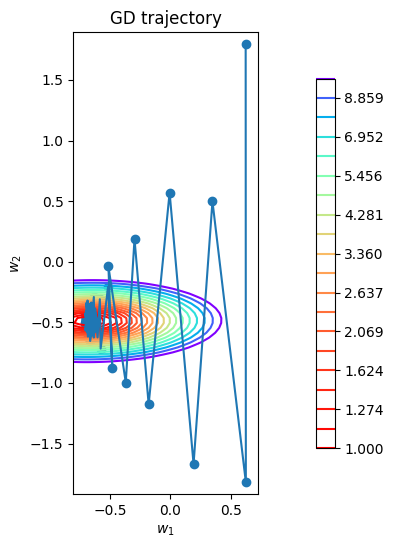

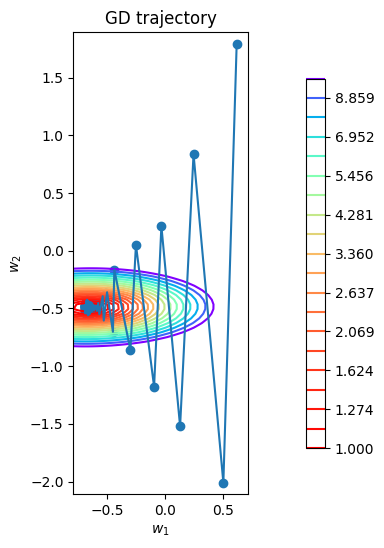

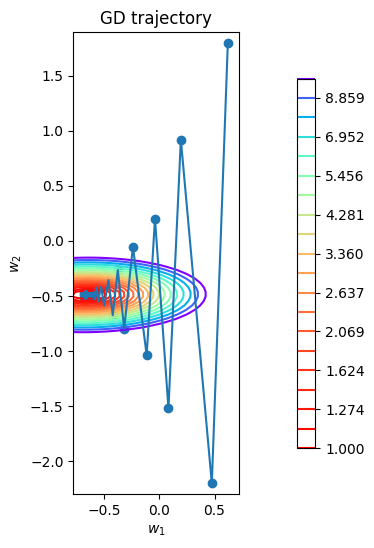

In [175]:
lr_values = [0.0001, 0.001, 0.01, 0.011]
batch_sizes = [10, 50, 100, 200]
loss = MSELoss()
for lr in lr_values:
  for bs in batch_sizes:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, bs, 1000)
    plot_gd(w_list, X, y, loss)

# Аналогично градиентному спуску параметр lr влияет на скорость обучения. Малые значения lr замедляет сходимость и может "застрять" в локальном минимуме.
# А большие значения lr ускоряют сходимость, но могут пропускать локальные минимумы.
# При малых значениях batch_size процесс сходимости SGD менее стабильный, так как объем данных очень небольшой, однако это повышает скорость.
# Большие значения batch_size увеличивают стабильность модели, на графиках траектория более ровная, однако замедляет процесс вычисления.
# SGD увеличивает скорость обучения, что важно для больших наборов данных. А также позволяет избежать момента попадания в локальный минимум, из которого невозможно выйти.
# В отличие от GD на графиках модель не сразу стремится прийти к оптимальному значению, а делает предварительно некоторое количество больших шагов.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [176]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    ans = []
    size = w_init.size
    ans.append(w_init)
    prev_w = w_init
    for i in range(1, n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      y_batch = y[batch_indices]
      new_w = np.zeros(size)
      lr_t = lr * ((1 / (1 + p))**p)
      new_w = prev_w - lr_t * loss.calc_grad(batch, y_batch, prev_w)
      ans.append(new_w)
      prev_w = new_w
    return ans

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

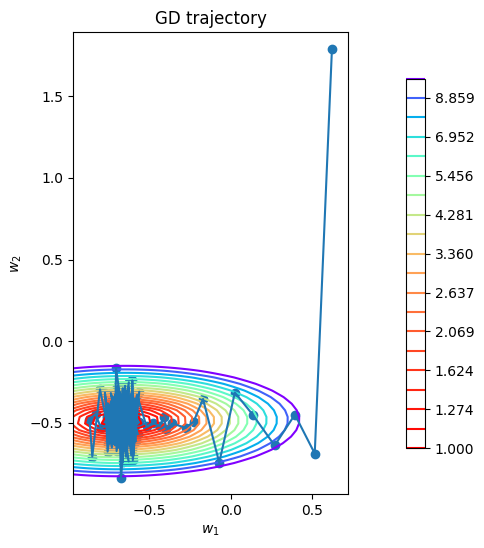

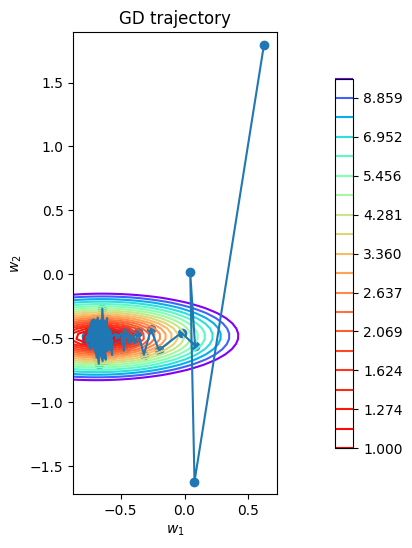

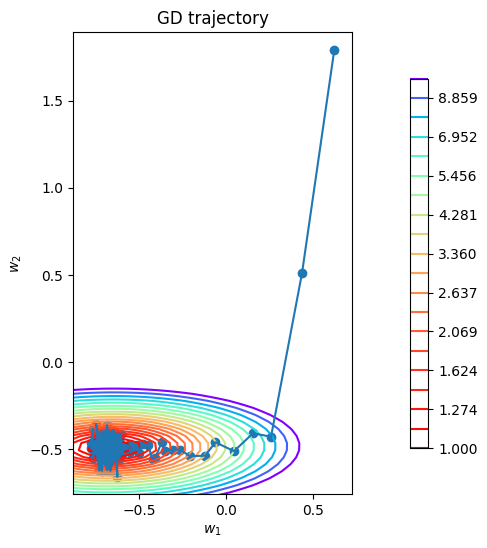

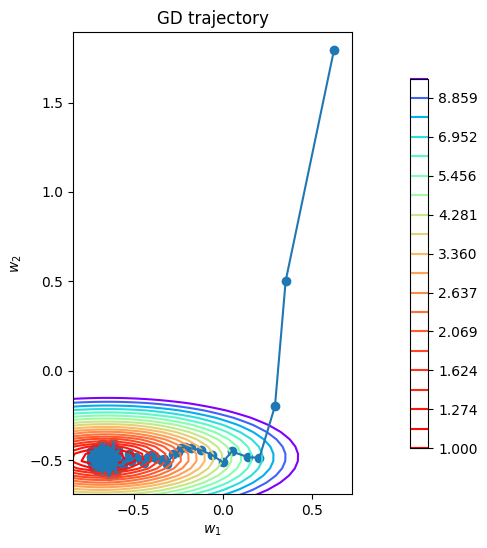

In [177]:
p_values = [0.1, 0.4, 0.6, 0.9]
loss = MSELoss()
for p in p_values:
  w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 1000)
  plot_gd(w_list, X, y, loss)

# Так как параметр p влияет и на значения векторов весов модели и на набор признаков, то
# при малых значениях p веса будут более разреженные и модель более устойчивая, а вот
# большие значения p могут ускорить сходимость модели, однако возможно переобучение, поэтому не стоит слишком сильно увеличивать значение p
# Также при малых p происходит более сильная регуляризация данных, а при больших p наоборот.
# На графиках довольно сложно выделить отличия при изменении параметра p, однако при увеличении p "больших" шагов становится меньше и
# и модель быстрее переходит к более меньшим(точечным) шагам.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

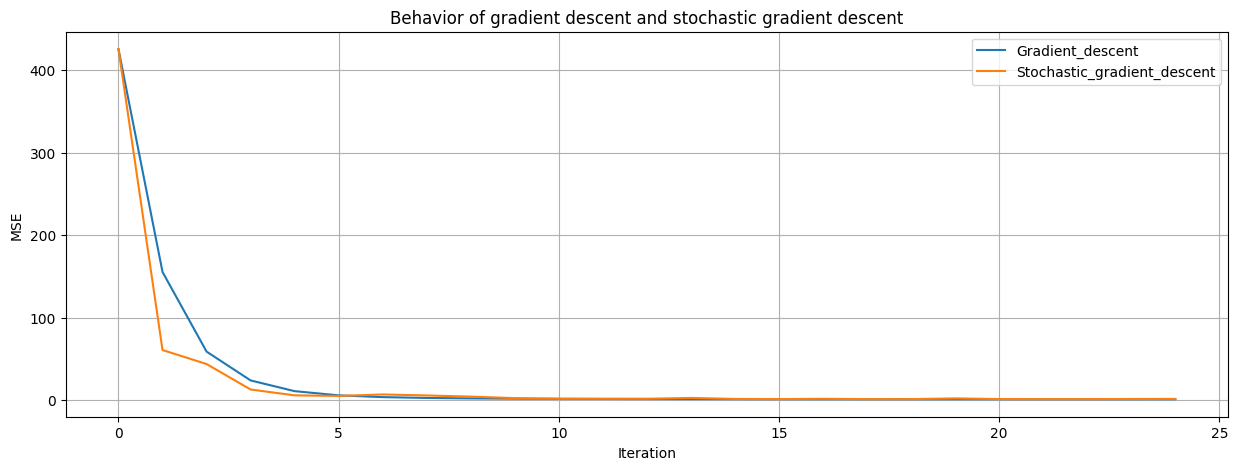

In [178]:
np.random.seed(234)

w_gd = gradient_descent(w_init, X, y, loss, lr=0.01, n_iterations=25)
w_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p=0.1, n_iterations=25)
MSE_gd = [loss.calc_loss(X, y, w) for w in w_gd]
MSE_sgd = [loss.calc_loss(X, y, w) for w in w_sgd]

plt.figure(figsize=(15, 5))
plt.plot(range(len(MSE_gd)), MSE_gd, label='Gradient_descent')
plt.plot(range(len(MSE_sgd)), MSE_sgd, label='Stochastic_gradient_descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Behavior of gradient descent and stochastic gradient descent')
plt.legend()
plt.grid(True)
plt.show()

# На данном графике видно небольшое преимущество SGD, оно небольшое, возможно это связано с тем, что размер входных данных достаточно мал.
# На малом объеме данных GD работает более точно, а время работы изменяется не сильно, в связи с этим GD достаточно хорошо находит оптимальные значения.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [179]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        self.w = np.random.rand(X.shape[1])
        w_values = gradient_descent(self.w, X, y, self.loss, self.lr)
        self.w = w_values[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [180]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [181]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)

X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [182]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [183]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [184]:
del X_raw['index']
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, random_state=np.random.seed(778), test_size=0.3)
X_train.head()

# Разделяем выборку на train и test, размер test выборки равен 0.3.

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25
161,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,four,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29
13,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25
149,0,77.0,toyota,gas,std,four,wagon,fwd,front,95.7,...,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,37
46,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17


In [185]:
print('Есть ли в датасете пропуски?', "Да" if np.any(X_raw.isna().values) else "Нет")

categorical = (X_raw.dtypes == "object").values
X_real_valued_train = X_train[X_train.columns[~categorical]]
X_real_valued_test = X_test[X_test.columns[~categorical]]
X_categorical_train = X_train[X_train.columns[categorical]]
X_categorical_test = X_test[X_test.columns[categorical]]

real_valued_imp = SimpleImputer(strategy="mean")
categorical_imp = SimpleImputer(strategy="constant", fill_value="")

X_real_no_miss_train = pd.DataFrame(data=real_valued_imp.fit_transform(X_real_valued_train), columns=X_real_valued_train.columns)
X_real_no_miss_test = pd.DataFrame(data=real_valued_imp.transform(X_real_valued_test), columns=X_real_valued_test.columns)

X_categorical_no_miss_train = pd.DataFrame(data=categorical_imp.fit_transform(X_categorical_train), columns=X_categorical_train.columns)
X_categorical_no_miss_test = pd.DataFrame(data=categorical_imp.transform(X_categorical_test), columns=X_categorical_test.columns)

# Убираем пропуски из датасета. Категориальные признаки заменяем пустыми строками. Вещественные - средним значением.

Есть ли в датасете пропуски? Да


In [186]:
normalizer = MinMaxScaler()
X_normed_train = pd.DataFrame(data=normalizer.fit_transform(X_real_no_miss_train), columns=X_real_no_miss_train.columns)
X_normed_test = pd.DataFrame(data=normalizer.transform(X_real_no_miss_test), columns=X_real_no_miss_test.columns)
X_normed_train.head()

# Нормализуем вещественные признаки с помощью MinMaxScaler.

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,0.2,0.146597,0.806897,0.798276,0.858586,0.725000,0.765831,0.441406,0.742857,0.747619,0.90625,0.338095,0.081633,0.250000,0.216216
1,0.6,0.539267,0.272414,0.415517,0.222222,0.400000,0.234594,0.109375,0.500000,0.480952,0.15000,0.285714,1.000000,0.361111,0.324324
2,0.6,0.312768,0.582759,0.765517,0.515152,0.658333,0.570336,0.367188,0.550000,0.533333,0.12500,0.328571,0.040816,0.194444,0.216216
3,0.4,0.062827,0.313793,0.432759,0.181818,0.941667,0.240969,0.085938,0.364286,0.457143,0.12500,0.047619,0.265306,0.500000,0.540541
4,0.4,0.312768,0.531034,0.812069,0.888889,0.000000,0.950701,1.000000,0.714286,0.328571,0.28125,1.000000,0.346939,0.000000,0.000000


In [187]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded_train = pd.DataFrame(data=encoder.fit_transform(X_categorical_no_miss_train), columns=encoder.get_feature_names_out())
X_encoded_test = pd.DataFrame(data=encoder.transform(X_categorical_no_miss_test), columns=encoder.get_feature_names_out())
X_encoded_train.head()

# Кодируем категориальные переменные с помощью OneHotEncoder.

,x0_alfa-romero,x0_audi,x0_bmw,x0_dodge,x0_honda,x0_isuzu,x0_jaguar,x0_mazda,x0_mercedes-benz,x0_mitsubishi,...,x8_six,x8_twelve,x8_two,x9_1bbl,x9_2bbl,x9_4bbl,x9_idi,x9_mfi,x9_mpfi,x9_spdi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [188]:
X_train = pd.concat([X_normed_train, X_encoded_train], axis=1)
X_test = pd.concat([X_normed_test, X_encoded_test], axis=1)
X_train.head()

# Объединяем нормализованные вещественные признаки и закодированные категориальные признаки в датасеты train и test.

,0,1,9,10,11,12,13,16,18,19,...,x8_six,x8_twelve,x8_two,x9_1bbl,x9_2bbl,x9_4bbl,x9_idi,x9_mfi,x9_mpfi,x9_spdi
0,0.2,0.146597,0.806897,0.798276,0.858586,0.725000,0.765831,0.441406,0.742857,0.747619,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.6,0.539267,0.272414,0.415517,0.222222,0.400000,0.234594,0.109375,0.500000,0.480952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.6,0.312768,0.582759,0.765517,0.515152,0.658333,0.570336,0.367188,0.550000,0.533333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.4,0.062827,0.313793,0.432759,0.181818,0.941667,0.240969,0.085938,0.364286,0.457143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.312768,0.531034,0.812069,0.888889,0.000000,0.950701,1.000000,0.714286,0.328571,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [189]:
lin_reg = linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [190]:
from sklearn.metrics import mean_squared_error

MSE_train = np.round(mean_squared_error(y_train, lin_reg.predict(X_train)), 2)
MSE_test = np.round(mean_squared_error(y_test, lin_reg.predict(X_test)), 2)

print(f"Среднеквадратичная ошибка на обучающей выборке равна: {MSE_train}")
print(f"Среднеквадратичная ошибка на тестовой выборке равна: {MSE_test}")


Среднеквадратичная ошибка на обучающей выборке равна: 1507327.5
Среднеквадратичная ошибка на тестовой выборке равна: 9801858.48


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [191]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return ((np.dot(np.dot(X, w) - y, np.dot(X, w) - y) / X.shape[0])) + self.coef * np.square(np.linalg.norm(w[:-1]))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_with_last_zero = np.concatenate((w[:-1], np.array([0], dtype=w.dtype)))
        return (2 * np.dot(X.transpose(), (np.dot(X, w) - y)) / X.shape[0]) + 2 * self.coef * w_with_last_zero

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [192]:
linear_regression_2 = LinearRegression(MSEL2Loss(0.001))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [193]:
lin_reg_2 = linear_regression_2.fit(X_train, y_train)

In [194]:
MSE_reg_train = np.round(mean_squared_error(y_train, lin_reg_2.predict(X_train)), 2)
MSE_reg_test = np.round(mean_squared_error(y_test, lin_reg_2.predict(X_test)), 2)

print(f"Среднеквадратичная ошибка с регуляризацией на обучающей выборке равна: {MSE_reg_train}")
print(f"Среднеквадратичная ошибка с регуляризацией на тестовой выборке равна: {MSE_reg_test}")

# Коэффициент регуляризации равный 0.001 помог улучшить результаты. Теперь MSE на тестовой выборке стал меньше, чем без регуляризации.

Среднеквадратичная ошибка с регуляризацией на обучающей выборке равна: 1860039.71
Среднеквадратичная ошибка с регуляризацией на тестовой выборке равна: 6569783.25


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [195]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def check_coef_for_loss(self, z: float) -> float:
        if (z > -self.eps and z < self.eps):
            return 0.5 * z**2
        else:
            return self.eps * (np.abs(z) - 0.5 * self.eps)

    def check_coef_for_grad(self, z: float) -> float:
        if (z > -self.eps and z < self.eps):
            return z
        else:
            return self.eps * np.sign(z)

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        return np.mean([self.check_coef_for_loss(np.dot(X[i], w) - y[i]) for i in range(X.shape[0])])

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return np.mean([X[i] * self.check_coef_for_grad(np.dot(X[i], w) - y[i]) for i in range(X.shape[0])], axis=0)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [196]:
linear_regression_3 = LinearRegression(HuberLoss(30))

In [197]:
lin_reg_3 = linear_regression_3.fit(X_train, y_train)

In [198]:
HuberLoss_train = np.round(mean_squared_error(y_train, lin_reg_3.predict(X_train)), 2)
HuberLoss_test = np.round(mean_squared_error(y_test, lin_reg_3.predict(X_test)), 2)

print(f"HuberLoss с на обучающей выборке равна: {HuberLoss_train}")
print(f"HuberLoss на тестовой выборке равна: {HuberLoss_test}")

# Значение регрессии с huberLoss стали хуже на обучающей выборке, чем регресии с MSELoss, однако
# значения на тестовой выборке стали намного лучше, чем при MSE и MSE с регуляризацией.
# Это происходит, так как huberloss более устойчив к выбросам.

HuberLoss с на обучающей выборке равна: 3296307.61
HuberLoss на тестовой выборке равна: 4698355.68


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2024 в ячейку ниже:

In [199]:
%%html
<iframe src="https://drive.google.com/file/d/17DDI5asEiixsmGeCWXkE5xm5_D9bMt9j/preview" width="640" height="480" allow="autoplay"></iframe>

<iframe src="https://drive.google.com/file/d/17DDI5asEiixsmGeCWXkE5xm5_D9bMt9j/preview" width="640" height="480" allow="autoplay"></iframe>

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [200]:
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    start_temperature: float,
    cr: float,
    n_iterations: int = 1000,
) -> np.ndarray:
    """
    Функция Имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param start_temperature: float -- параметр начальной температуры
    :param cr: float -- параметр коэффициент охлаждения
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    ans = []
    size = w_init.size
    ans.append(w_init)
    prev_w = w_init
    prev_temperature = start_temperature
    for i in range(1, n_iterations):
        new_w = prev_w + np.random.standard_t(3, size=prev_w.shape)
        delta_error = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, prev_w)
        if (delta_error < 0) or (np.random.uniform(0, 1) < np.exp(-delta_error / prev_temperature)):
            prev_w = new_w
        prev_temperature *= cr
        ans.append(prev_w)
    return ans

In [201]:
np.random.seed(913)

n_features = 2
n_objects = 200
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

loss = MSELoss()
w_gd = gradient_descent(w_init, X, y, loss, lr=0.0125, n_iterations=1000)
w_sa = simulated_annealing(w_init, X, y, loss, start_temperature=10, cr=0.8, n_iterations=1000)

mse_gd = np.round(loss.calc_loss(X, y, w_gd[-1]), 3)
mse_sa = np.round(loss.calc_loss(X, y, w_sa[-1]), 3)

print("Финальный MSE после градиентного спуска:", mse_gd)
print("Финальный MSE после имитации отжига:", mse_sa)

# Финальный MSE после имитации отжига стал немного лучше

Финальный MSE после градиентного спуска: 0.999
Финальный MSE после имитации отжига: 0.993


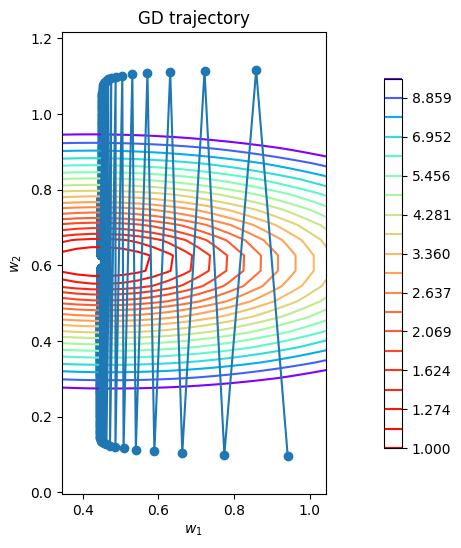

In [202]:
plot_gd(w_gd, X, y, loss)

# Траектория для градиентного спуска оказалась очень нестабильной, значения весов на каждом шаге менялись постоянно и очень кардинально
# однако по итогу модель все равно пришла к локальному минимуму

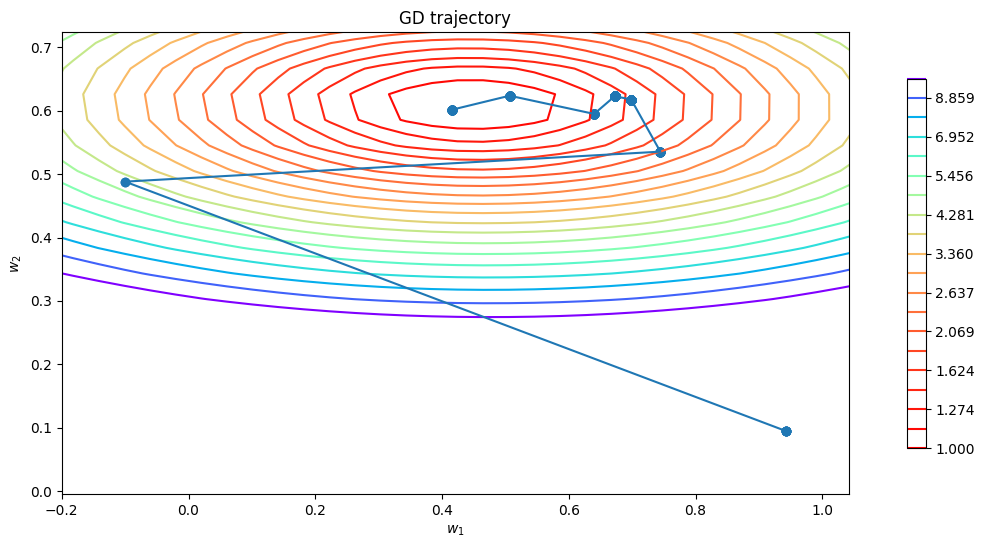

In [203]:
plot_gd(w_sa, X, y, loss)

# Траектория для имитации отжига более структурная и четкая. С каждым шагом модель приближается к локальному минимуму и достаточно быстро достигает его.